# 中心极限定理

## 1. 随机行走问题

考虑一个一维随机行走问题。根据以下几种情况走出每一步：

- 1）方向随机，步幅是均匀随机数 (`np.random.uniform(size)-0.5`)#把中心挪到0
- 2）方向随机，步幅是正态分布随机数 (`np.random.normal(size)`)
- 3）步幅根据 Logisitic Map 的混沌序列取。(作业)

假设行走的初始点在原点，定义 $n$ 步距离 $s(n)$: $$s(n)= x_{1}+x_{2}+...x_{i}+...+x_{n}$$

如果进行 $M$ 次随机行走，每次都走 $n$ 步，通过数值实验发现 $s(n)$ 的分布及其与 $n$ 的关系。



In [2]:
import matplotlib.pyplot as plt # 导入图形库
import numpy as np
from scipy import stats
%matplotlib inline

### 第一种情况

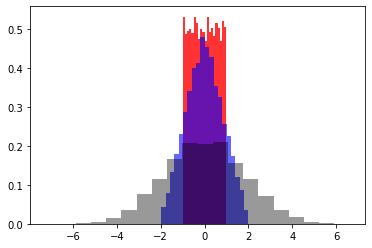

In [31]:
M = 10000 # 随机实验次数

def random_work(M,n):
    s_n = np.zeros(M)
    for i in np.arange(n):
        s_n += np.random.uniform(-1,1,size=M)
        #s_n += np.random.normal(size=M)
    return s_n
n1=1
n2=2
n3=10
plt.hist(random_work(M,n1),20, facecolor='red',alpha=0.8,density=True);
plt.hist(random_work(M,n2),20, facecolor='blue',alpha=0.6,density=True);
plt.hist(random_work(M,n3),20, facecolor='black',alpha=0.4,density=True);


In [19]:
 s_n = np.zeros(100)
for i in np.arange(10):
    s_n += np.random.uniform(-1,1,size=100)

In [20]:
s_n

array([-2.41718548e-01, -1.56149357e-01,  2.60867265e+00,  1.57612834e+00,
        1.82532890e+00, -9.05201080e-01,  2.32453109e+00, -1.06828919e+00,
       -1.52498584e+00, -3.23392687e+00,  1.38361609e+00,  1.70222712e+00,
        1.93177657e-03,  4.72241953e-01, -1.29222698e+00,  2.57029036e+00,
        3.20492026e+00, -1.82812702e+00,  3.32226374e+00,  2.71428904e-01,
       -1.16734997e-01, -1.78902452e-01,  1.18407167e+00,  1.56448973e+00,
       -1.35903720e+00,  2.19564062e-03, -1.50521766e-01, -2.54372064e+00,
        1.52758097e+00, -2.92171567e+00, -1.90427948e+00, -5.38450423e-01,
       -9.07336831e-01, -4.19089301e-01, -1.54691258e+00,  1.58634870e+00,
       -1.24248075e+00,  1.73701678e+00, -1.41092608e+00,  1.79932834e+00,
       -1.96665058e+00,  7.00310955e-01, -6.37527208e-01, -1.90102956e+00,
        2.24645854e+00, -2.64807805e+00, -1.18466266e+00, -1.48767309e+00,
       -1.08954622e+00, -1.84027920e+00,  3.39158082e+00, -8.09181402e-01,
        2.31736239e+00,  

### 重标度

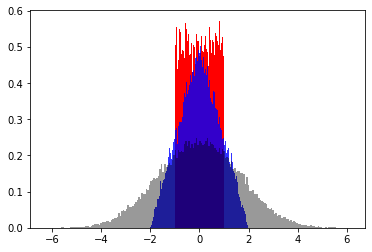

In [6]:
M=50000

n1=1
n2=2
n3=8

Sn1=random_work(M,n1)
Sn2=random_work(M,n2)
Sn3=random_work(M,n3)

nn1,bins1,patches1=plt.hist(Sn1,200, facecolor='red',alpha=1,density=True)
nn2,bins2,patches2=plt.hist(Sn2,200, facecolor='blue',alpha=0.8,density=True)
nn3,bins3,patches3=plt.hist(Sn3,200, facecolor='black',alpha=0.4,density=True)

In [7]:
bins1=bins1/np.std(Sn1)
bins2=bins2/np.std(Sn2)
bins3=bins3/np.std(Sn3)

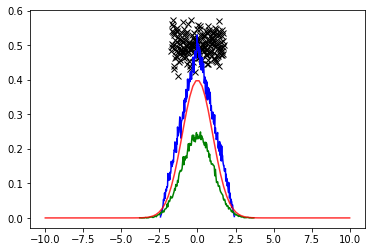

In [9]:
plt.plot((bins1[:-1]+bins1[1:])/2,nn1,'kx')
plt.plot((bins2[:-1]+bins2[1:])/2,nn2,'b')
plt.plot((bins3[:-1]+bins3[1:])/2,nn3,'g')

def Normal_function(x):
    return np.exp(-x*x/2)/np.sqrt(2*np.pi)

xx=np.linspace(-10,10,100)

f=Normal_function(xx)
plt.plot(xx,f,'r-',alpha=0.8)


### 作业：

1)探索均方根与 $n$ 的定量关系

2)每一步都由 Logisitc Map 生成

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def logi(x,r):
    x=r*x*(1-x)
    return x

r=np.linspace(0,4,5000)
x=np.random.rand(len(r))
#dx=np.zeros(len(r))

for i in np.arange(0,5000):
    x=logi(x,r)

#plt.figure(figsize=(16, 8))
#plt.grid(True)
#s_n =[]
for i in np.arange(0,1000):
    x=logi(x,4)
    plt.hist(x,200, facecolor='red',alpha=0.8,density=True)
    #s_n=s_n.extend(x)
#plt.hist(s_n,20, facecolor='red',alpha=0.8,density=True)
    #plt.plot(r,x,'k.',markersize=0.1)
    #dx=dx+np.log(np.abs(r-2*r*x))
    